# Face Detection with UniFace

This notebook demonstrates face detection using the **UniFace** library.

## 1. Install UniFace

In [1]:
%pip install -q uniface

# Clone repo for assets (Colab only)
import os
if 'COLAB_GPU' in os.environ or 'COLAB_RELEASE_TAG' in os.environ:
    if not os.path.exists('uniface'):
        !git clone --depth 1 https://github.com/yakhyo/uniface.git
    os.chdir('uniface/examples')

Note: you may need to restart the kernel to use updated packages.


## 2. Import Libraries

In [2]:
import cv2
import IPython.display as display
from PIL import Image

import uniface
from uniface.detection import RetinaFace
from uniface.visualization import draw_detections

print(uniface.__version__)

2.0.0


## 3. Initialize the Detector

In [3]:
detector = RetinaFace(
    confidence_threshold=0.5,
    nms_threshold=0.4,
)

## 4. Load and Display Input Image

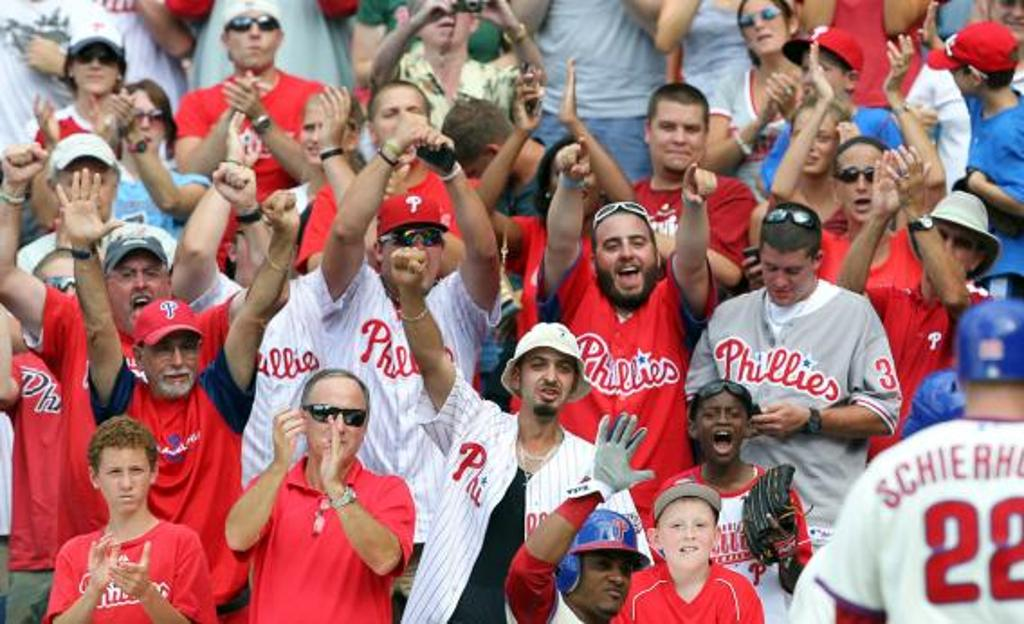

In [4]:
image_path = '../assets/test.jpg'
pil_image = Image.open(image_path)
pil_image

## 5. Detect Faces

Detected 27 face(s)


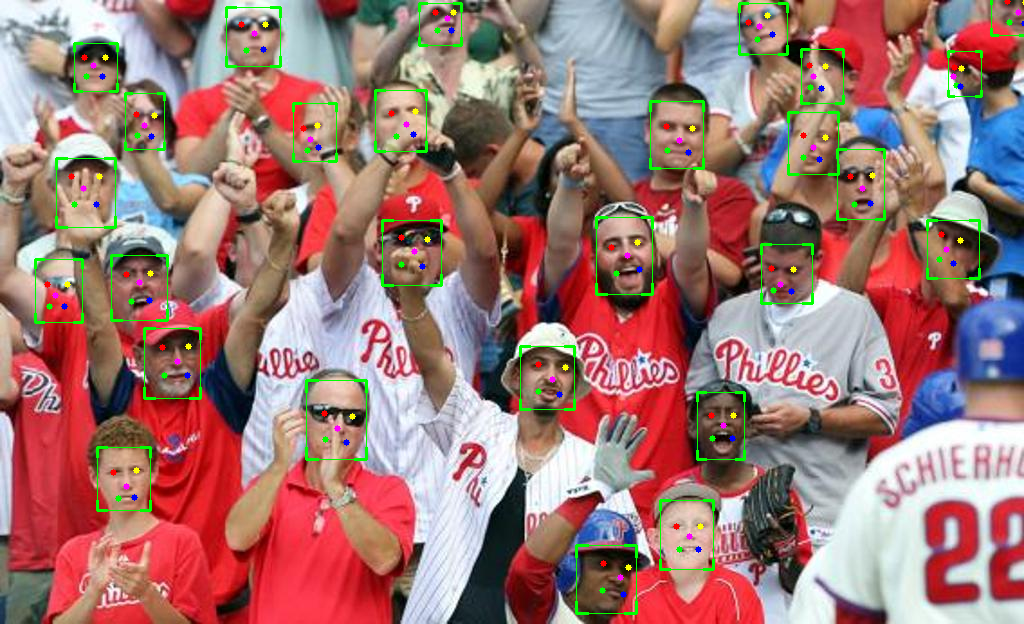

In [5]:
# Load image
image = cv2.imread(image_path)

# Detect faces - returns list of Face objects
faces = detector.detect(image)
print(f'Detected {len(faces)} face(s)')

# Unpack face data for visualization
bboxes = [f.bbox for f in faces]
scores = [f.confidence for f in faces]
landmarks = [f.landmarks for f in faces]

# Draw detections
draw_detections(image=image, bboxes=bboxes, scores=scores, landmarks=landmarks, vis_threshold=0.6, fancy_bbox=True)

# Display result
output_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
display.display(Image.fromarray(output_image))

## 6. Detect Top-K Faces

Use `max_num` to limit the number of detected faces.

### Top-2 faces:

Detected 2 face(s)


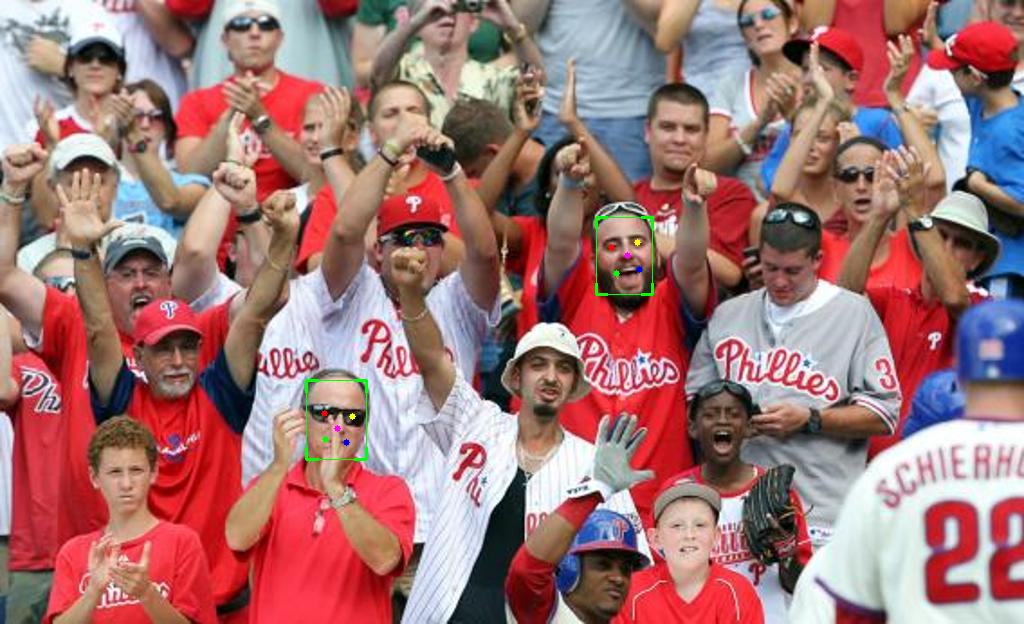

In [6]:
image = cv2.imread(image_path)

faces = detector.detect(image, max_num=2)
print(f'Detected {len(faces)} face(s)')

bboxes = [f.bbox for f in faces]
scores = [f.confidence for f in faces]
landmarks = [f.landmarks for f in faces]

draw_detections(image=image, bboxes=bboxes, scores=scores, landmarks=landmarks, vis_threshold=0.6, fancy_bbox=True)

output_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
display.display(Image.fromarray(output_image))

### Top-5 faces:

Detected 5 face(s)


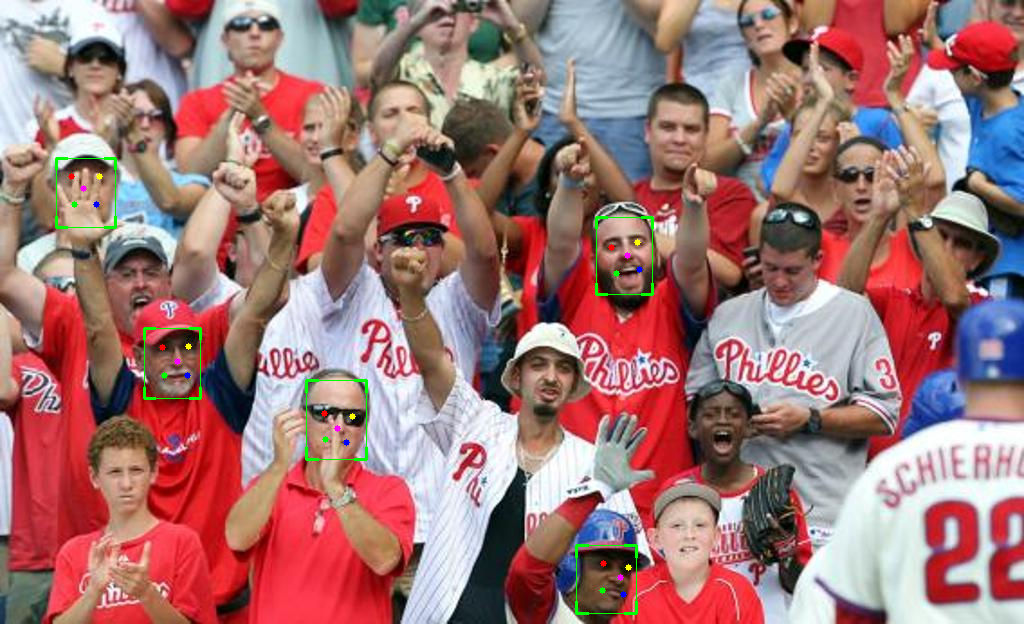

In [7]:
image = cv2.imread(image_path)

faces = detector.detect(image, max_num=5)
print(f'Detected {len(faces)} face(s)')

bboxes = [f.bbox for f in faces]
scores = [f.confidence for f in faces]
landmarks = [f.landmarks for f in faces]

draw_detections(image=image, bboxes=bboxes, scores=scores, landmarks=landmarks, vis_threshold=0.6, fancy_bbox=True)

output_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
display.display(Image.fromarray(output_image))

## Notes

- `detect()` returns a list of `Face` objects with attributes: `bbox`, `confidence`, `landmarks`
- Access attributes using dot notation: `face.bbox`, `face.confidence`, `face.landmarks`
- Adjust `conf_thresh` and `nms_thresh` for your use case
- Use `max_num` to limit detected faces